# Title: Add title here
*2023 datathon and conference on Efficient Data Analysis for the Condition Assessment of Bridges*

**Author(s):** Add author name here

**Affiliation(s):** Add author affiliation here



## Abstract
Write abstract here.

## Content
Write the main body of Notebook text below this point.

### Headings and subheadings
To break your document into sections use "##" for section headings and "###" for section subheadings. 

To write *italic* text, enclose the text in "\*". 

To write **bold** text, enclose the text in "\*\*".

### Bullet points and numbered lists

- This is an example of a bullet point.
- This is another example of a bullet point.
    - This is an example of a subpoint

1. This is an example of a numbered list.
1. This continues the numbered list.
    1. This is an example of a nested list.
    1. This is a further subpoint.

### Including equations in Jupyter Notebooks
Notebooks use *LaTex* text formatting. Equations can be written inline, such as $e=mc^2$, or as seperate equation blocks as shown below.

$y = Ax+C$

### Including hyperlinks in Jupyter Notebooks
We can include hyperlinks through combinations of square and rounded brackets like [this](https://blogs.ed.ac.uk/edacab/).

### Including tables in Jupyter Notebooks
Tables use the notation shown below:

| Column 1 | Column 2 | Column 3 |
| --- | --- | --- |
| Value 1 | Description 1  | A note |
| Value 2 | Description 2  | A much longer note to demonstrate how columns expand as needed |
| Value 3 | Description 3  | A third note.|
| Value 4 | Description 4  | A further note |

### Including images in Jupyter Notebooks

To include images we upload them to the notebook and reference them using the HTML code shown below.

<div><center>
    <img src="./Example_Image.JPG" width="25%"/>
</center></div>

### Further help
For further guidance on writing Jupter Notebooks refer to [this guide](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) or [this summary](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet).

## Adding MATLAB code to Jupyter Notebooks
To add MATLAB code to Jupyter notebooks we define a new *code block*. This block behaves like a typical MATLAB interpreter, allowing us to write functions, define variables and plot data. Two example blocks of MATLAB code are shown below. The first block of code defines a function through the special "%%file" cell decorator. The second block of code executes the cell.

In [24]:
%%file calculateSquaredValue.m
function ave = calculateSquaredValue(x)
    ave = x.^2; 
end

Created file 'C:\Users\S1879083\Documents\GitHub\EDACAB\DeepNote_MATLAB_templates\calculateSquaredValue.m'.


In [25]:
input_data = 1:100;
output_data = calculateSquaredValue(input_data);
disp('The first ten output values are:')
disp(output_data(1:10))

The first ten output values are:
     1     4     9    16    25    36    49    64    81   100




Any variables or functions we have previously defined in carry over to future code blocks, as shown below.

In [26]:
disp('The first ten output values are still:')
disp(output_data(1:10))

The first ten output values are still:
     1     4     9    16    25    36    49    64    81   100




We can plot figures inline to help demonstrate relationships between variables.

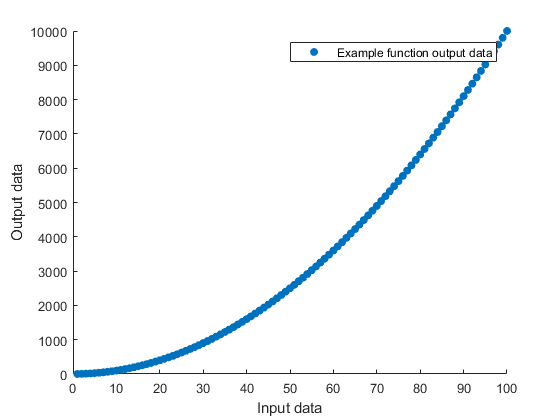

In [27]:
scatter(input_data,output_data,'filled')
xlabel('Input data')
ylabel('Output data')
legend('Example function output data')

## Accessing the shaker table transfer function data

The transfer function data for each test condition (damage state) is stored as a CSV file. The block of code below loads the CSV from the conference website and displays the column headers.

In [28]:
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/TF_working_condition_01.csv";

data = readtable(url);
data = renamevars(data,['Frequency_Hz_'],['Frequency [Hz]']);
disp(data.Properties.VariableNames)

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
  Columns 1 through 14

    {'Frequency [Hz]'}    {'A2'}    {'AY1'}    {'AY2'}    {'AY3'}    {'AY5'}    {'AY6'}    {'AY7'}    {'R1'}    {'R2'}    {'AZ2'}    {'AZ4'}    {'AZ5'}    {'AZ6'}

  Columns 15 through 25

    {'AZ7'}    {'E11'}    {'E12'}    {'E13'}    {'A4'}    {'A5'}    {'A6'}    {'A7'}    {'A8'}    {'A9'}    {'A10'}




### Plotting the transfer function data
The block of code below plots the magnitude of the frequency transfer function for accelerometer ‘AZ2’ for test condition 01.

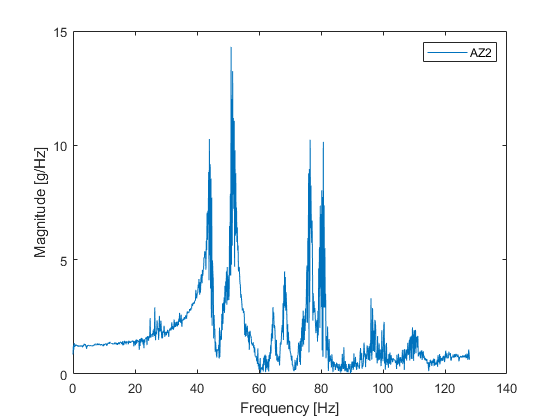

In [29]:
figure
subplot()
channel = 'AZ2';
plot(data{:,'Frequency [Hz]'},data{:,channel});

legend(channel)
xlabel('Frequency [Hz]')
ylabel('Magnitude [g/Hz]')

## Comparing transfer functions from the damaged and undamaged structure

The block of code below compares the frequency transfer function of accelerometer ‘AZ2’ for test conditions 01 and 16, highlighting how the dynamic behaviour of the structure has changed due to the damage. We can see in the plot that the frequency at which peaks occur has decreased, likely due to a reduction in the stiffness of the frame due to cracking. Alongside this the peaks are broader and have lower magnitudes, likely due to increased damping of the structure due to friction occuring at the cracks.

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.



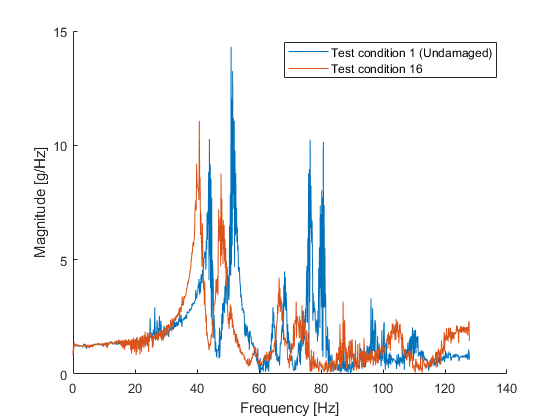

In [30]:
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/TF_working_condition_16.csv";

data16 = readtable(url);
data16 = renamevars(data16,['Frequency_Hz_'],['Frequency [Hz]']);

figure
subplot()

hold on
channel = 'AZ2';

plot(data{:,'Frequency [Hz]'},data{:,channel});
plot(data16{:,'Frequency [Hz]'},data_16{:,channel});

legend('Test condition 1 (Undamaged)', 'Test condition 16')
xlabel('Frequency [Hz]')
ylabel('Magnitude [g/Hz]')

## Accessing acceleration data from the damaged structure
The data for each working condition (magnitude of earthquake excitation) is stored as a CSV file. The code below loads and formats the data for working condition *e1*.

The block of code below loads the CSV from the conference website and displays the column headers.

In [31]:
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/Shaker_table_data_working_condition_e1.csv";

data = readtable(url);
fs = 50;
data = renamevars(data,['Time_s_'],['Time [s]']);
disp(data.Properties.VariableNames)

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
  Columns 1 through 15

    {'Time [s]'}    {'InputForce'}    {'A10'}    {'A1'}    {'A2'}    {'A3'}    {'A4'}    {'A5'}    {'A6'}    {'A7'}    {'A8'}    {'A9'}    {'AY1'}    {'AY2'}    {'AY3'}

  Columns 16 through 27

    {'AY4'}    {'AY5'}    {'AY6'}    {'AY7'}    {'AZ2'}    {'AZ3'}    {'AZ4'}    {'AZ5'}    {'AZ6'}    {'AZ7'}    {'R1'}    {'R2'}




### Plotting the shaker table data acceleration data
The block of code below plots all the Z direction measuring point responses for working condition e1, alongside their 10-second Welch averaged power spectral density.

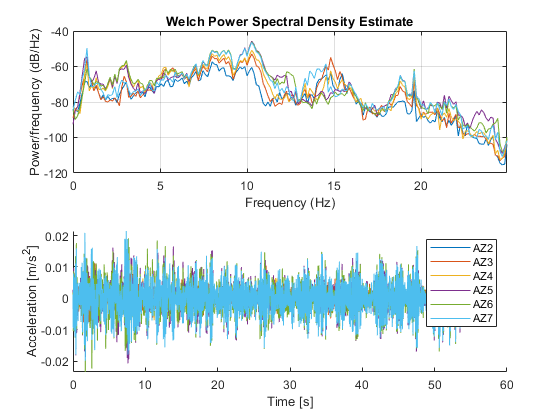

In [32]:
figure
subplot(2,1,1)
hold on
for channel = data.Properties.VariableNames
    if contains(channel,'Z')
        pwelch(data{:,channel{1}},[],floor(15*fs),floor(7.5*fs),fs);
    end
end

hold off
subplot(2,1,2)
hold on
label_list = {};
for channel = data.Properties.VariableNames
    if contains(channel,'Z')

        plot(data{:,'Time [s]'},data{:,channel{1}});
        label_list{end+1} = channel{1};
    end
end
legend(label_list)
xlabel('Time [s]')
ylabel('Acceleration [m/s^2]')

### Loading and plotting the input excitation

The input excitation, also sampled at 50Hz, from the El Centro wave is also stored within the CSV file.

The block of code below plots the input excitation for working condition *e1* against time.

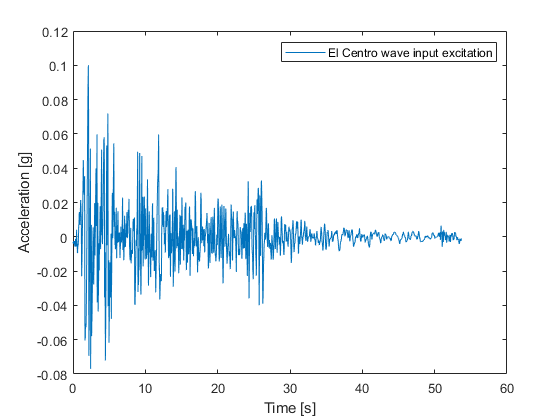

In [33]:
plot(data{:,'Time [s]'},data{:,'InputForce'});

legend('El Centro wave input excitation')
xlabel('Time [s]')
ylabel('Acceleration [g]')

The block of code below compares the input excitation with the output from accelerometer *A2* for working condition *e1*.

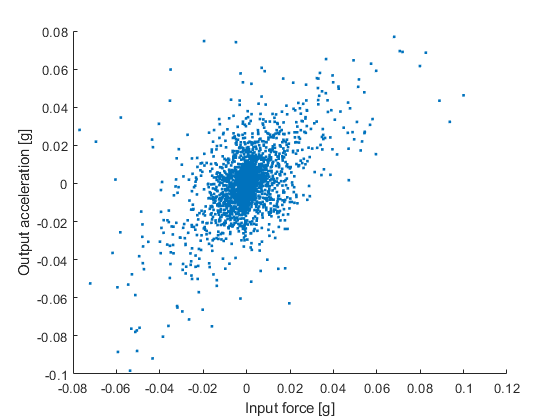

In [34]:
scatter(data{:,'InputForce'},data{:,'A2'},'.');

ylabel('Output acceleration [g]')
xlabel('Input force [g]')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e1ffcd3c-a30d-4451-8b1e-264dee75edb8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>